<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_591_box_of_bricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

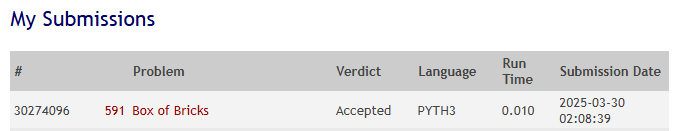

**@PDF: [UVA 591 - Box of Bricks](https://onlinejudge.org/external/5/591.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 591 Box of Bricks

Little Bob likes playing with his box of bricks. He puts the bricks one upon another and builds stacks of different height. "Look, I've built a wall!", he tells his older sister Alice. "Nah, you should make all stacks the same height. Then you would have a real wall.", she retorts. After a little consideration, Bob sees that she is right. So he sets out to rearrange the bricks, one by one, such that all stacks are the same height afterwards. But since Bob is lazy he wants to do this with the minimum number of bricks moved. Can you help?

## Input

The input consists of several data sets. Each set begins with a line containing the number n of stacks Bob has built. The next line contains n numbers, the heights $h_{i}$ of the n stacks. You may assume $1 \le n \le 50$ and $1 \le h_{i} \le 100$.

The total number of bricks will be divisible by the number of stacks. Thus, it is always possible to rearrange the bricks such that all stacks have the same height.

The input is terminated by a set starting with $n=0$. This set should not be processed.

## Output

For each set, first print the number of the set, as shown in the sample output. Then print the line 'The minimum number of moves is k.' where k is the minimum number of bricks that have to be moved in order to make all the stacks the same height.

Output a blank line after each set.

## Sample Input

6\
5 2 4 1 7 5\
0


## Sample Output

Set #1\
The minimum number of moves is 5.

In [ ]:
import sys

# --- Problem Description ---
# Problem: UVA 591 - Box of Bricks
# Input: Number of stacks (n), followed by n stack heights (h_i).
# Goal: Find the minimum number of bricks to move so all stacks have the same height.
# Constraints: 1 <= n <= 50, 1 <= h_i <= 100. Total bricks divisible by n.
# Input terminates with n = 0.
# Output: Formatted output including set number and minimum moves, with a blank line between sets.

# --- Data Structures and Algorithms (DSA) Comments ---
#
# Data Structures Used:
#   - List (Python `list`): To store the initial heights `h_i` of the `n` stacks[cite: 9].
#     Lists provide efficient O(n) iteration for summing and calculating moves.
#   - Integers: Used for storing the number of stacks (`n`), individual heights (`h_i`),
#               the total number of bricks (`total_bricks`), the calculated target height
#               (`target_height`), the minimum moves count (`minimum_moves`), and the
#               set counter (`set_number`). Standard integer types are sufficient given
#               the constraints[cite: 10].
#
# Algorithm: Average Height and Deviation Summation
#   1. Determine the Target Height:
#      - Since the goal is to make all stacks equal height without adding or removing bricks
#        overall[cite: 6], the final height of each stack must be the average height of the
#        initial stacks.
#      - Calculate the total number of bricks: `total_bricks = sum(heights)`.
#      - Calculate the target height: `target_height = total_bricks / n`.
#      - The problem statement guarantees that `total_bricks` is divisible by `n`[cite: 11],
#        so the `target_height` will always be an integer. Integer division (`//`) can be used.
#
#   2. Calculate Minimum Moves:
#      - The minimum number of moves corresponds to the total number of bricks residing
#        in stacks *above* the calculated `target_height`.
#      - Why? Each brick moved must come *from* a stack taller than the target and go *to*
#        a stack shorter than the target. The total number of bricks above the target
#        height across all taller stacks represents the total "surplus" that needs redistribution.
#        This surplus amount *must* be moved to fill the "deficit" in the shorter stacks.
#        Therefore, summing the surplus gives the minimum required moves[cite: 7].
#      - Iterate through each stack's height `h` in the `heights` list.
#      - If a stack's height `h` is greater than `target_height`, calculate the difference:
#        `diff = h - target_height`. This `diff` represents the number of bricks that
#        must be moved *from this specific stack*.
#      - Add this `diff` to a running total `minimum_moves`.
#      - The final value of `minimum_moves` is the answer.
#
# Time Complexity: O(n) per test case.
#   - Reading `n`: O(1).
#   - Reading `n` heights: O(n).
#   - Calculating `sum(heights)`: O(n).
#   - Calculating `target_height`: O(1).
#   - Calculating `minimum_moves` (second iteration): O(n).
#   - Total complexity is dominated by the linear scans, resulting in O(n). This is very
#     efficient for the given constraint n <= 50[cite: 10].
#
# Space Complexity: O(n) per test case.
#   - Required to store the `n` heights in the `heights` list. Auxiliary space beyond
#     storing the input is O(1).

# --- Main Program Logic ---

set_number = 0 # Initialize counter for output formatting [cite: 13]
while True:
    set_number += 1 # Increment for each new data set

    # Read the number of stacks for the current set.
    n_str = sys.stdin.readline()
    # Handle potential early EOF or read errors.
    if not n_str:
        break
    try:
        n = int(n_str.strip())
    except ValueError:
        break # Exit if input is not a valid integer

    # Check for the input termination condition (n=0)[cite: 12].
    if n == 0:
        break

    # Read the n stack heights from the next line.
    try:
        heights_str = sys.stdin.readline().strip().split()
        # Convert height strings to integers and store in a list.
        heights = [int(h) for h in heights_str]
        # Basic validation: ensure we read exactly n heights.
        if len(heights) != n:
             # Handle potential mismatch between n and number of heights read
             continue # Or break, depending on desired error handling
    except (ValueError, EOFError):
        break # Exit on conversion errors or unexpected EOF

    # --- Core Calculation Steps ---

    # 1. Calculate the total number of bricks.
    total_bricks = sum(heights)

    # 2. Calculate the target height (average height).
    # Integer division '//' is safe as total_bricks is guaranteed divisible by n[cite: 11].
    target_height = total_bricks // n

    # 3. Calculate the minimum number of moves required.
    # Sum the differences for stacks taller than the target height.
    minimum_moves = 0
    for h in heights:
        if h > target_height:
            minimum_moves += (h - target_height)

    # --- Output Formatting ---

    # Print the set number identifier[cite: 13].
    print(f"Set #{set_number}")
    # Print the calculated minimum number of moves[cite: 14].
    print(f"The minimum number of moves is {minimum_moves}.")
    # Print the required blank line after each set's output[cite: 15].
    print()